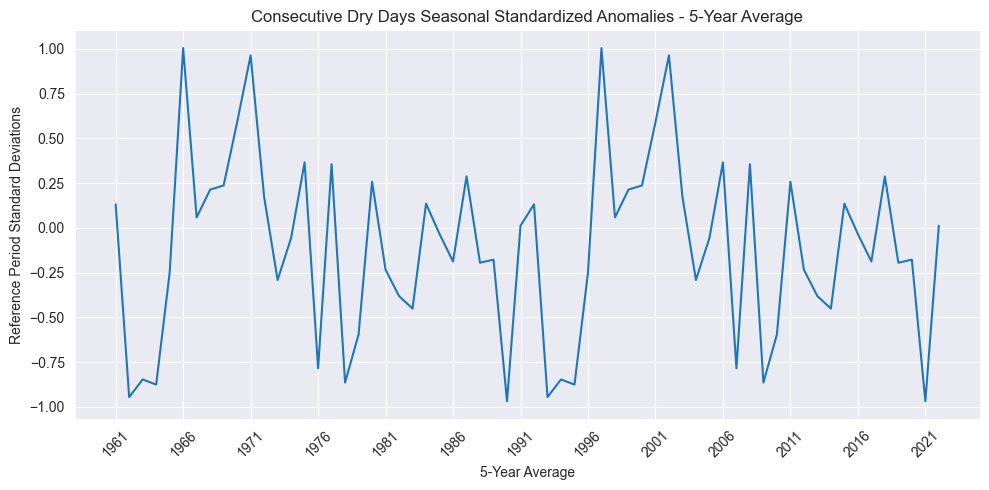

In [6]:
#  All Region combined with 5-year average from 1961 to 2021 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Reading the CDD Seasonal Dataset
data = pd.read_csv(r'..\data\Cleaned_Data_Seasonal.csv')

# Generate sample data as per your description for demonstration purposes
years = np.arange(1961, 2023)
cdd_values = np.random.randn(len(years))  # Placeholder for actual CDD values
data = pd.DataFrame({
    'Year': np.repeat(years, 4),  # Assuming 4 seasons per year
    'CDD_Seasonal_Smoothed': np.tile(cdd_values, 4)  # Repeat the same values for all seasons
})

# Calculate the 5-year rolling average, assuming the data is in chronological order
data['5_Year_Avg'] = data.groupby('Year')['CDD_Seasonal_Smoothed'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())

# Plotting
plt.figure(figsize=(10, 5))

# Take the mean of the 5-year averages for each year to plot
yearly_avg = data.groupby('Year')['5_Year_Avg'].mean()
plt.plot(yearly_avg.index, yearly_avg.values)

plt.title('Consecutive Dry Days Seasonal Standardized Anomalies - 5-Year Average')
plt.xlabel('5-Year Average')
plt.ylabel('Reference Period Standard Deviations')

# Set x-axis to only show labels for every 5 years starting from 1961
xticks = np.arange(1961, 2022, 5)
plt.xticks(xticks, rotation=45)

plt.grid(True)
plt.tight_layout()  # Adjust layout for better fit
plt.show()

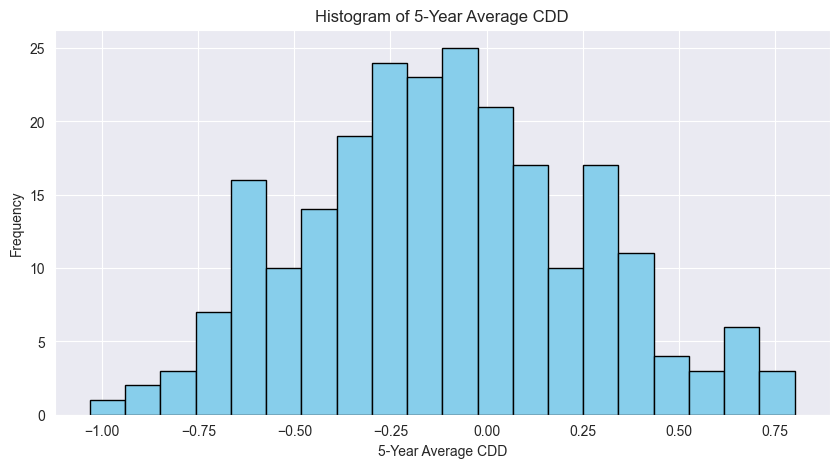

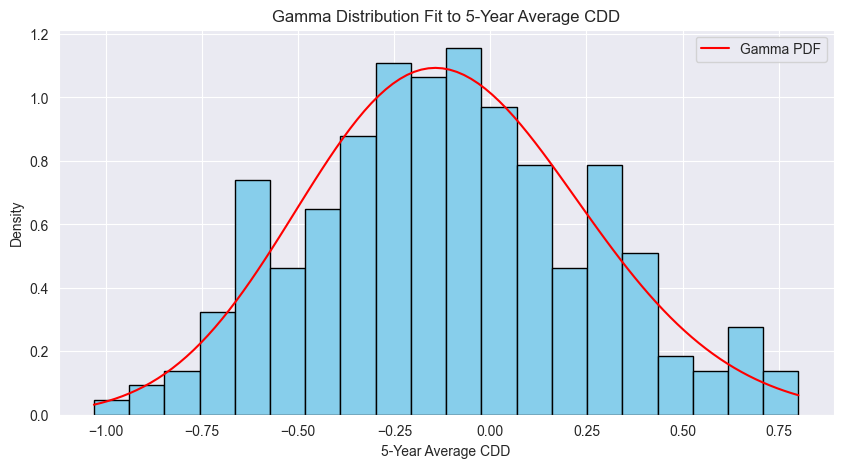

In [7]:
#  Historgram and Gamma distribution for CDD 5 year average

# Since we don't have the actual data, we will simulate it for a single region 'ALA' from 1961 to 2023
years = np.arange(1961, 2024)
seasons = [1, 2, 3, 4]
cdd_values = np.random.randn(len(years) * len(seasons))  # Simulating CDD values as random normally distributed numbers

# Create a DataFrame
data = pd.DataFrame({
    'Year': np.repeat(years, len(seasons)),
    'Season': seasons * len(years),
    'CDD_Seasonal_Smoothed': cdd_values
})

# Calculate the 5-year rolling average for each season
data['5_Year_Avg'] = data.groupby('Season')['CDD_Seasonal_Smoothed'].transform(lambda x: x.rolling(window=5).mean())

# Drop NaN values that result from the rolling average calculation
data.dropna(inplace=True)

# Select a region if your data contains multiple regions
# data = data[data['Region'] == 'Your Region']

# Plot a histogram of the 5-year average CDD values
plt.figure(figsize=(10, 5))
plt.hist(data['5_Year_Avg'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of 5-Year Average CDD')
plt.xlabel('5-Year Average CDD')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Fit a gamma distribution to the data
fit_alpha, fit_loc, fit_beta = gamma.fit(data['5_Year_Avg'])
x = np.linspace(min(data['5_Year_Avg']), max(data['5_Year_Avg']), 100)
y = gamma.pdf(x, fit_alpha, fit_loc, fit_beta)

# Plot the gamma distribution fit
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'r-', label='Gamma PDF')
plt.hist(data['5_Year_Avg'], bins=20, color='skyblue', edgecolor='black', density=True)
plt.title('Gamma Distribution Fit to 5-Year Average CDD')
plt.xlabel('5-Year Average CDD')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

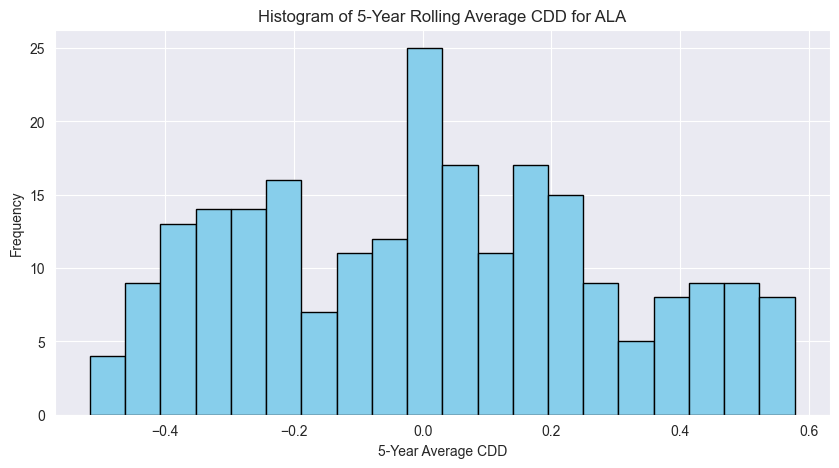

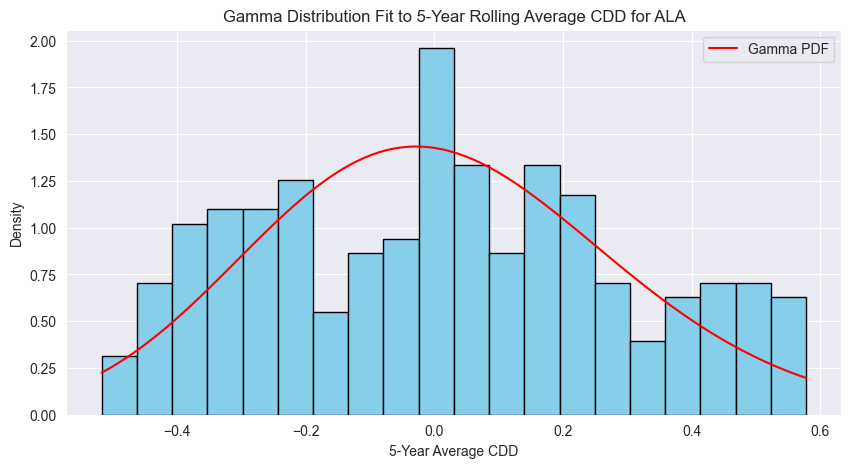

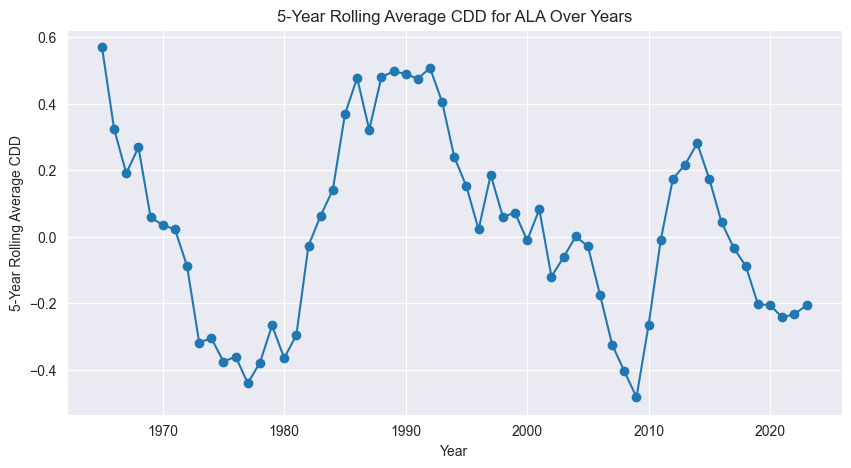

In [8]:
# Histogram and Gamma distribution - 5 Year Average for only the Region 'ALA'

# For the sake of this example, let's assume we're working with the 'ALA' region
# In practice, you would filter your actual dataset to include only the data for 'ALA'
# Simulate data for the 'ALA' region
np.random.seed(0)  # Seed for reproducibility
data_ala = pd.DataFrame({
    'Year': np.repeat(years, 4),  # 4 seasons per year
    'Season': np.tile([1, 2, 3, 4], len(years)),  # Seasons 1 through 4 for each year
    'CDD_Seasonal_Smoothed': np.random.randn(len(years) * 4)  # Random CDD values for the example
})

# Calculate the 5-year rolling average for the 'ALA' region
data_ala['5_Year_Avg'] = data_ala['CDD_Seasonal_Smoothed'].rolling(window=5*4).mean()

# Drop rows where the 5-year average could not be computed (first 4 years)
data_ala.dropna(subset=['5_Year_Avg'], inplace=True)

# Plotting
# Histogram of the 5-year rolling averages
plt.figure(figsize=(10, 5))
plt.hist(data_ala['5_Year_Avg'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of 5-Year Rolling Average CDD for ALA')
plt.xlabel('5-Year Average CDD')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Fit a gamma distribution to the 5-year rolling averages
fit_alpha, fit_loc, fit_beta = gamma.fit(data_ala['5_Year_Avg'])
x = np.linspace(min(data_ala['5_Year_Avg']), max(data_ala['5_Year_Avg']), 100)
y = gamma.pdf(x, fit_alpha, fit_loc, fit_beta)

# Plot the gamma distribution fit
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'r-', label='Gamma PDF')
plt.hist(data_ala['5_Year_Avg'], bins=20, color='skyblue', edgecolor='black', density=True)
plt.title('Gamma Distribution Fit to 5-Year Rolling Average CDD for ALA')
plt.xlabel('5-Year Average CDD')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Line plot of the 5-year rolling averages over years
# For each year, we'll take the mean of the 5-year averages of the four seasons
yearly_avg_ala = data_ala.groupby('Year')['5_Year_Avg'].mean()

plt.figure(figsize=(10, 5))
plt.plot(yearly_avg_ala.index, yearly_avg_ala.values, marker='o', linestyle='-')
plt.title('5-Year Rolling Average CDD for ALA Over Years')
plt.xlabel('Year')
plt.ylabel('5-Year Rolling Average CDD')
plt.grid(True)
plt.show()

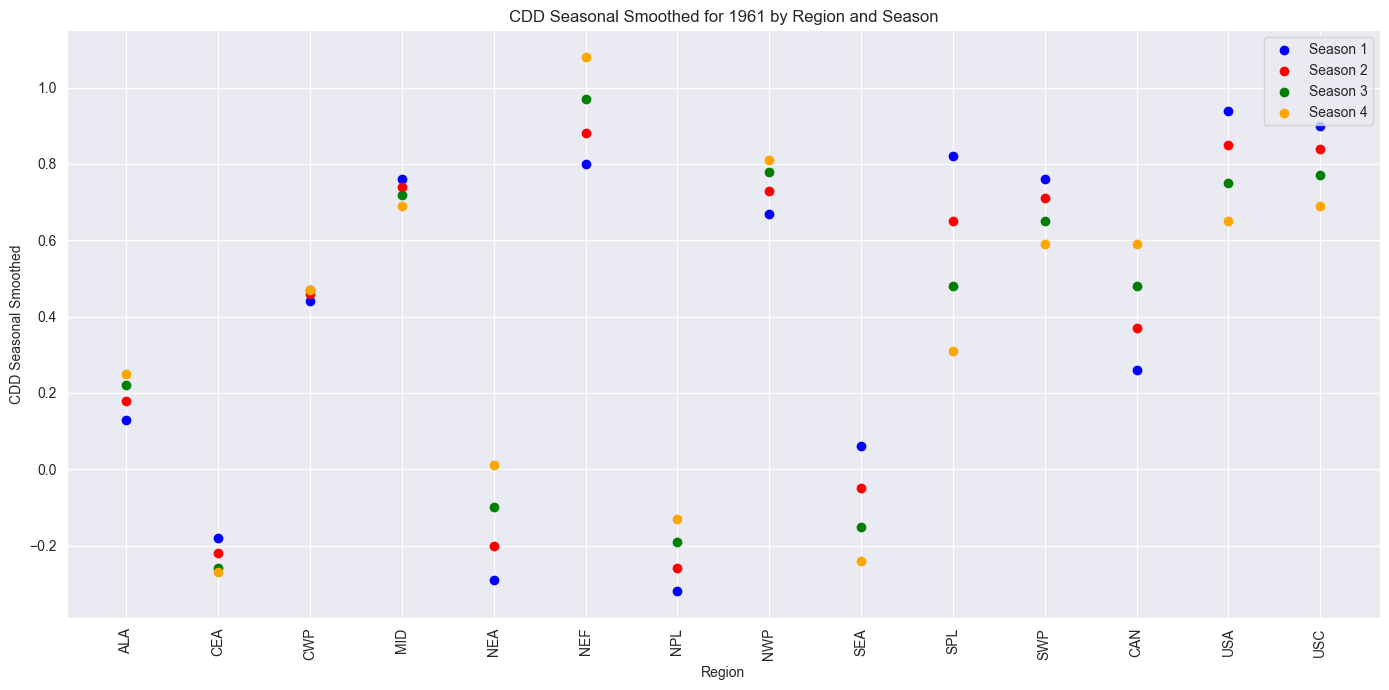

In [9]:
# CDD Smoothed Data for 1961 by Region and all seasons
# Simulating loading of the provided data into a DataFrame
data = pd.DataFrame({
    'Region': ['ALA', 'CEA', 'CWP', 'MID', 'NEA', 'NEF', 'NPL', 'NWP', 'SEA', 'SPL', 'SWP', 'CAN', 'USA', 'USC',
               'ALA', 'CEA', 'CWP', 'MID', 'NEA', 'NEF', 'NPL', 'NWP', 'SEA', 'SPL', 'SWP', 'CAN', 'USA', 'USC',
               'ALA', 'CEA', 'CWP', 'MID', 'NEA', 'NEF', 'NPL', 'NWP', 'SEA', 'SPL', 'SWP', 'CAN', 'USA', 'USC',
               'ALA', 'CEA', 'CWP', 'MID', 'NEA', 'NEF', 'NPL', 'NWP', 'SEA', 'SPL', 'SWP', 'CAN', 'USA', 'USC'],
    'Year': [1961]*14 + [1961]*14 + [1961]*14 + [1961]*14,
    'Season': [1]*14 + [2]*14 + [3]*14 + [4]*14,
    'CDD_Seasonal_Smoothed': [0.13, -0.18, 0.44, 0.76, -0.29, 0.8, -0.32, 0.67, 0.06, 0.82, 0.76, 0.26, 0.94, 0.9,
                              0.18, -0.22, 0.46, 0.74, -0.2, 0.88, -0.26, 0.73, -0.05, 0.65, 0.71, 0.37, 0.85, 0.84,
                              0.22, -0.26, 0.47, 0.72, -0.1, 0.97, -0.19, 0.78, -0.15, 0.48, 0.65, 0.48, 0.75, 0.77,
                              0.25, -0.27, 0.47, 0.69, 0.01, 1.08, -0.13, 0.81, -0.24, 0.31, 0.59, 0.59, 0.65, 0.69 ]
})

# Dropping rows with missing CDD data
data.dropna(subset=['CDD_Seasonal_Smoothed'], inplace=True)

# Plotting the CDD data for each region for the year 1961, season 1 and 2
plt.figure(figsize=(14, 7))

# Create a scatter plot for season 1
season1 = data[data['Season'] == 1]
plt.scatter(season1['Region'], season1['CDD_Seasonal_Smoothed'], color='blue', label='Season 1')

# Create a scatter plot for season 2
season2 = data[data['Season'] == 2]
plt.scatter(season2['Region'], season2['CDD_Seasonal_Smoothed'], color='red', label='Season 2')

# Create a scatter plot for season 3
season3 = data[data['Season'] == 3]
plt.scatter(season3['Region'], season3['CDD_Seasonal_Smoothed'], color='green', label='Season 3')

# Create a scatter plot for season 4
season4 = data[data['Season'] == 4]
plt.scatter(season4['Region'], season4['CDD_Seasonal_Smoothed'], color='Orange', label='Season 4')

plt.title('CDD Seasonal Smoothed for 1961 by Region and Season')
plt.xlabel('Region')
plt.ylabel('CDD Seasonal Smoothed')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()